### Problem Definition: Alphabet Recognition

#### Dataset: https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format
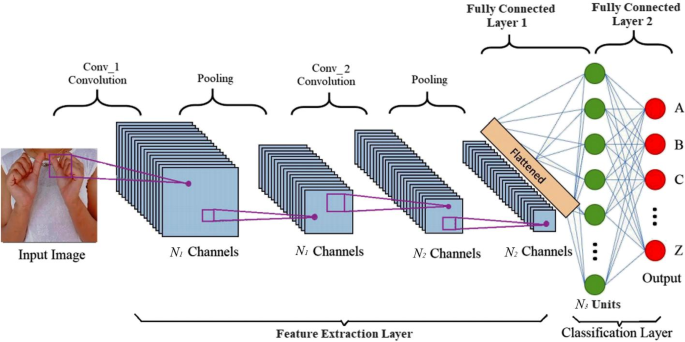


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

## Updating width of Jupyter notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
pd.set_option('display.max_colwidth', 2000)
pd.options.display.max_seq_items = 2000
pd.options.display.max_rows = 4000

In [2]:
#pip install emnist

**EMNIST (Extended MNIST)** is a dataset and library that provides access to handwritten character images, including letters, digits, and symbols, with over 800,000 images in total.

In [3]:
from emnist import extract_training_samples, extract_test_samples

X_train, y_train = extract_training_samples('letters')
X_test, y_test = extract_test_samples('letters')

In [4]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   3   4   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  20 109 114  45   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 114 245 253 214   5   0   0   0   0   0  20 100  33   1   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 125 249 254 233  22   0   0   0   0  10 123 238 163  33   0
    0   0   0   2   4   4   0   0   0   0]
 [  0   0   0  82 233 254 251  82   2   0   0   3  79 220 254 244 126   0
    0   0   3  77 125 113   8   0   0   0]
 [  0   0   0  37 217 254 254 128   5   0   0  34 204 254 255 254 216   5
    0  22 154 247 254 253 111   3   0   0]
 [  0   0   0  37 217 254 254 160  16   0   3  84 233 254 255 254 233  22
   10  95 232 254 254 246  77   2   0   0]
 [  0   0   0  39 217 254 254 184  25   0  34 175 251 254 255 25

In [5]:
#print(y_train[0])

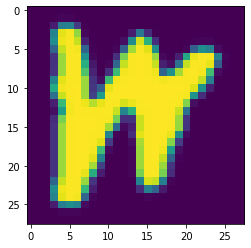

In [6]:
plt.imshow(X_train[0].reshape(28,28)) 

In [7]:
#print(y_train[4])

In [8]:
#plt.imshow(X_train[4].reshape(28,28)) 

In [9]:
X_train.shape

## in the training set we have 124800 images of size 28 x 28.

(124800, 28, 28)

**imshow** is a function in the matplotlib library in Python that displays an image in a plot.

Here we are using imshow to display arrays of pixels as an image in a plot.

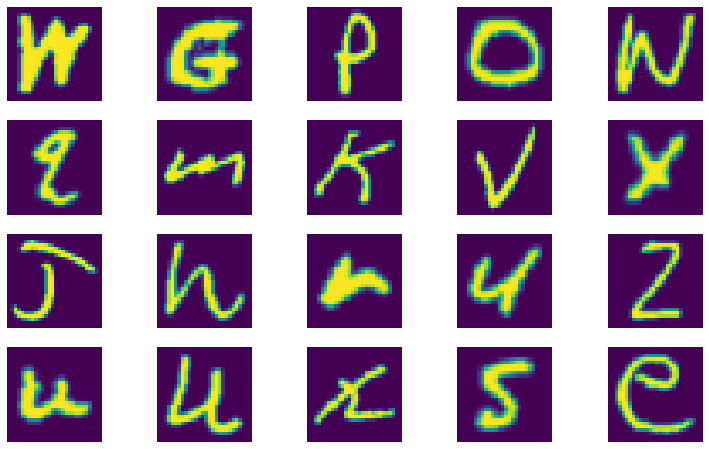

In [10]:
fig = plt.figure(figsize = (13,8))
for i in range(0,20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_train[i].reshape(28,28)) 
    plt.axis('off')



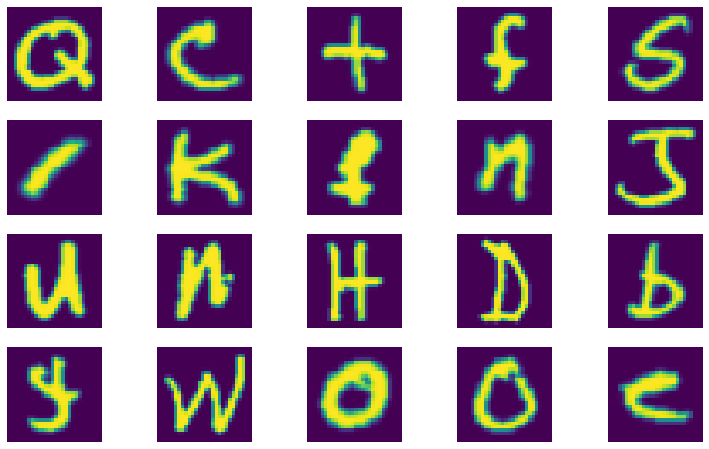

In [11]:
## Picking random images from the dataset.
import random

fig = plt.figure(figsize = (13,8))
for i in range(0,20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_train[i + random.randint(1, X_train.shape[0])].reshape(28,28)) 
    plt.axis('off')

# HYPER PARAMETER TUNING

1. USE EARLY STOPPING TO DETERMINE IDEA NUMBER OF EPOCHS.
2. DropOut Rate
3. Take real time image as an input n predict. Display actual image first then show what is predicted.
4. save model

In [12]:
print(y_train)

[23  7 16 ... 13 15 19]


In [13]:
np.unique(y_train, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=uint8),
 array([4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800,
        4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800,
        4800, 4800, 4800, 4800], dtype=int64))

In [14]:
np.unique(y_test, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=uint8),
 array([800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800,
        800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800, 800],
       dtype=int64))

In [15]:
## Plotting number of image count per letter

# import string

# #visualize number of  character classes 
# plt.figure(figsize=(15,9))

# # Create a list of the alphabet characters
# alphabet = list(string.ascii_uppercase)

# sns.set(style='whitegrid')
# g = sns.countplot(y_train, palette="icefire")
# plt.title("Distribution of Labels in Classes")


# # Set the tick labels to the alphabet characters
# plt.xticks(range(26),alphabet)
# plt.xlabel(None)


## Importing Tensorflow and related libraries for image processing

In [16]:
# pip install emnist

In [17]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [18]:
from tensorflow.keras.utils import to_categorical

## Normalize the data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

## To categorise with to_categorical index must start with 0
y_train = y_train - 1
y_test = y_test - 1

y_train = to_categorical(y_train,26) # 26 output classes
y_test = to_categorical(y_test,26)

## Reshaping to data to add gray scale to the data
# X_train = np.expand_dims(X_train, axis = -1)
# X_test = np.expand_dims(X_test, axis = -1)

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

## Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.2, random_state = 51 )

## Data Augmentation
datagen = ImageDataGenerator(
    zoom_range = 0.1,
    shear_range = 0.1,
    rotation_range=20,
    horizontal_flip=True)

In [19]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [20]:
X_train.shape

(99840, 28, 28, 1)

## Building the CNN

In [21]:
cnn = tf.keras.models.Sequential()

In [22]:
## adding 1st convolution layer
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size=3, strides =1, activation = 'relu', input_shape = (28,28,1)))
## adding 1st pooling layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 1))

## adding second layer of convolution layer
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size=3, strides =1, activation = 'relu'))
## adding second layer of pooling layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 1))

## flatting input
cnn.add(tf.keras.layers.Flatten())

## Full Connection
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

## Output layer
cnn.add(tf.keras.layers.Dense(units = 26, activation = 'softmax'))


## Compiling the CNN

## Try using sparse cross entropy

In [23]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [24]:
## Early stopping to avoid overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
history = cnn.fit(datagen.flow(X_train, y_train, batch_size = 32), epochs = 25 , validation_data = (X_val, y_val), callbacks = [early_stopping])

Epoch 1/25
3120/3120 [==============================] - 200s 64ms/step - loss: 0.7070 - accuracy: 0.7744 - val_loss: 0.4085 - val_accuracy: 0.8674
Epoch 2/25
3120/3120 [==============================] - 428s 137ms/step - loss: 0.4301 - accuracy: 0.8582 - val_loss: 0.3705 - val_accuracy: 0.8744
Epoch 3/25
3120/3120 [==============================] - 194s 62ms/step - loss: 0.3751 - accuracy: 0.8751 - val_loss: 0.3228 - val_accuracy: 0.8919
Epoch 4/25
3120/3120 [==============================] - 446s 143ms/step - loss: 0.3460 - accuracy: 0.8836 - val_loss: 0.3254 - val_accuracy: 0.8901
Epoch 5/25
3120/3120 [==============================] - 342s 110ms/step - loss: 0.3217 - accuracy: 0.8912 - val_loss: 0.3014 - val_accuracy: 0.8998
Epoch 6/25
3120/3120 [==============================] - 195s 62ms/step - loss: 0.3080 - accuracy: 0.8954 - val_loss: 0.3175 - val_accuracy: 0.8911
Epoch 7/25
3120/3120 [==============================] - 195s 63ms/step - loss: 0.2950 - accuracy: 0.8991 - val_loss

In [ ]:
# cnn.save('Alphabet_Recognizer_32.h5') # with 32 filters

In [ ]:
# cnn.save('Alphabet_Recognizer_16.h5') # with 16 filters

In [ ]:
cnn.save('Alphabet_Recognizer_64.h5') # with 64 filters

from keras.models import load_model

loaded_model = load_model('Alphabet_Recognizer.h5')

In [ ]:
## Evaluate the model on the test set
test_loss, test_accuracy = cnn.evaluate(X_test, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# get predictions on the validation set
y_pred = cnn.predict(X_test)

# convert predictions from probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# calculate the confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred)

# calculate the accuracy
acc = accuracy_score(y_test.argmax(axis=1), y_pred)

print("Accuracy:", (acc*100).round(2))

In [ ]:
tn = cm[0, 0]
fp = cm[0, 1:].sum()
fn = cm[1:, 0].sum()
tp = cm[1:, 1:].sum()

# print the number of true positives and true negatives
print("True Positives:", tp)
print("True Negatives:", tn)

a = tp+fn+fp+tp

In [ ]:
# display the confusion matrix as a heatmap
plt.figure(figsize=(23,12))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
